In [12]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import os

warnings.simplefilter("ignore")

plt.style.use('seaborn')
plt.style.use('seaborn-notebook')

%load_ext autoreload
%autoreload 2

from soma.generators.nmist import NmistGenerator
from soma.generators.normal import MultivariateNormalGenerator
from soma.generators.dc2 import DC2Generator
from soma.tests import som_test, knn_test, c2s_knn_test, c2s_nn_test
from soma.util.errors import stat_errors_vs_dimension
from soma.util.plot import plot_power

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
plot_dir = os.path.expanduser('~/Plots/power_dim')
os.makedirs(plot_dir, exist_ok=True)

In [7]:
tests = {
    'knn': knn_test,
    'som': som_test,
    'c2st_knn': c2s_knn_test,
    'c2st_nn': c2s_nn_test,
}

# DC2 MAG Filtered

In [5]:
dc2 = DC2Generator()
dc2_abs = DC2Generator(abs_mag=22)

In [8]:
dc2_dims, dc2_results = stat_errors_vs_dimension(dc2_abs, dc2, tests)

  0%|          | 0/12 [00:00<?, ?it/s]

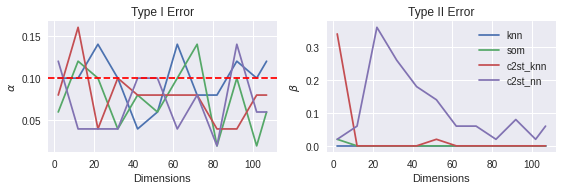

In [35]:
dc2_abs_fig = plot_power(dc2_dims, dc2_results)
dc2_abs_fig.savefig(os.path.join(plot_dir, 'dc2_mag_power_dim.eps'))

# DC2 SNR

In [15]:
dc2_snr = DC2Generator(snr=10)

In [16]:
dc2_snr_dim, dc2_snr_results = stat_errors_vs_dimension(dc2_snr, dc2, tests)

  0%|          | 0/12 [00:00<?, ?it/s]

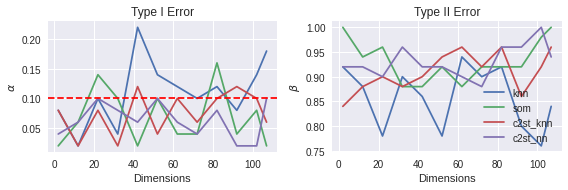

In [34]:
dc2_snr_fig = plot_power(dc2_snr_dim, dc2_snr_results)
dc2_snr_fig.savefig(os.path.join(plot_dir, 'dc2_snr_power_dim.eps'))

# NMIST

In [18]:
nmist2 = NmistGenerator(2)
nmist3 = NmistGenerator(3)

In [20]:
nmist_dim, nmist_results = stat_errors_vs_dimension(nmist2, nmist3, tests, step=50)

  0%|          | 0/17 [00:00<?, ?it/s]

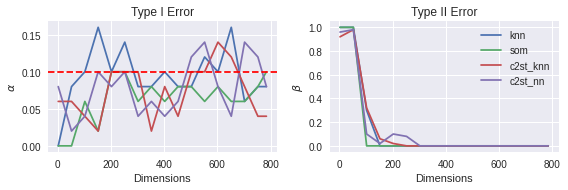

In [33]:
nmist_fig = plot_power(nmist_dim, nmist_results)
nmist_fig.savefig(os.path.join(plot_dir, 'nmist_power_dim.eps'))

# Normal (location)

In [22]:
means = np.zeros(1000)
means2 = np.ones(1000)

n1 = MultivariateNormalGenerator(means, cov=np.diag(np.ones(1000)))
n2 = MultivariateNormalGenerator(means2, cov=np.diag(np.ones(1000)))

In [24]:
normal_dim, normal_results = stat_errors_vs_dimension(n2, n1, tests, step=200)

  0%|          | 0/6 [00:00<?, ?it/s]

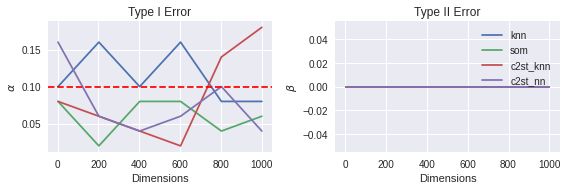

In [32]:
normal_loc_fig = plot_power(normal_dim, normal_results)
normal_loc_fig.savefig(os.path.join(plot_dir, 'normal_111_power_dim.eps'))

# Normal (location, fair)

In [26]:
means3 = np.zeros(1000)
means2[0] = 1.

n3 = MultivariateNormalGenerator(means3, cov=np.diag(np.ones(1000)))

In [36]:
n3_dims, n3_results = stat_errors_vs_dimension(n3, n1, tests, step=200)

  0%|          | 0/6 [00:00<?, ?it/s]

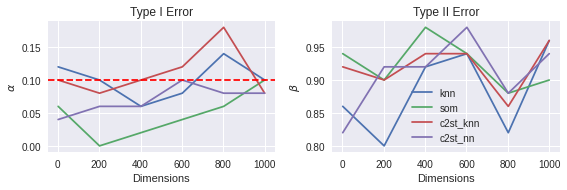

In [37]:
normal_fair_fig = plot_power(n3_dims, n3_results)
normal_fair_fig.savefig(os.path.join(plot_dir, 'normal_fair_power_dim.eps'))

# Normal (scale)

In [38]:
ns1 = MultivariateNormalGenerator(means, wishart_df=len(means)+1)
ns2 = MultivariateNormalGenerator(means, wishart_df=len(means)+1)

In [39]:
ns_dim, ns_results = stat_errors_vs_dimension(ns1, ns2, tests, step=200)

  0%|          | 0/6 [00:00<?, ?it/s]

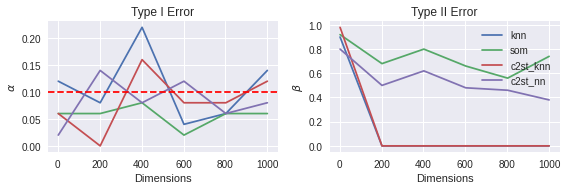

In [40]:
normal_scale_fig = plot_power(ns_dim, ns_results)
normal_scale_fig.savefig(os.path.join(plot_dir, 'normal_scale_power_dim.eps'))

# Normal (scale, fair)

In [41]:
nsf1 = MultivariateNormalGenerator(means, wishart_df=len(means)*32)
nsf2 = MultivariateNormalGenerator(means, wishart_df=len(means)*32)

In [42]:
nsf_dim, nsf_results = stat_errors_vs_dimension(nsf1, nsf2, tests, step=200)

  0%|          | 0/6 [00:00<?, ?it/s]

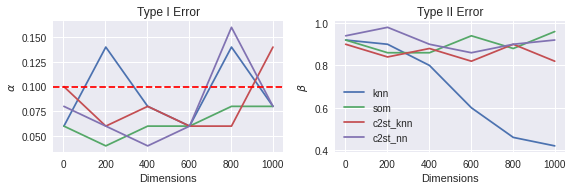

In [43]:
normal_scale_fair_fig = plot_power(nsf_dim, nsf_results)
normal_scale_fair_fig.savefig(os.path.join(plot_dir, 'normal_scale_fair_power_dim.eps'))